In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.data.csv')

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    int64  
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 54.1 KB


In [6]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,627,50,1
1,1,85,66,29,0,26.6,351,31,0
2,8,183,64,0,0,23.3,672,32,1
3,1,89,66,23,94,28.1,167,21,0
4,0,137,40,35,168,43.1,2288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171,63,0
764,2,122,70,27,0,36.8,340,27,0
765,5,121,72,23,112,26.2,245,30,0
766,1,126,60,0,0,30.1,349,47,1


In [8]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,471.876302,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,331.328595,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,243.750000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,372.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,626.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2420.000000,81.000000,1.000000


In [9]:
diabetes.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

<AxesSubplot:>

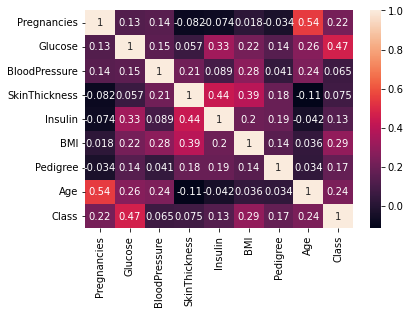

In [11]:
sns.heatmap(diabetes.corr(), annot=True)

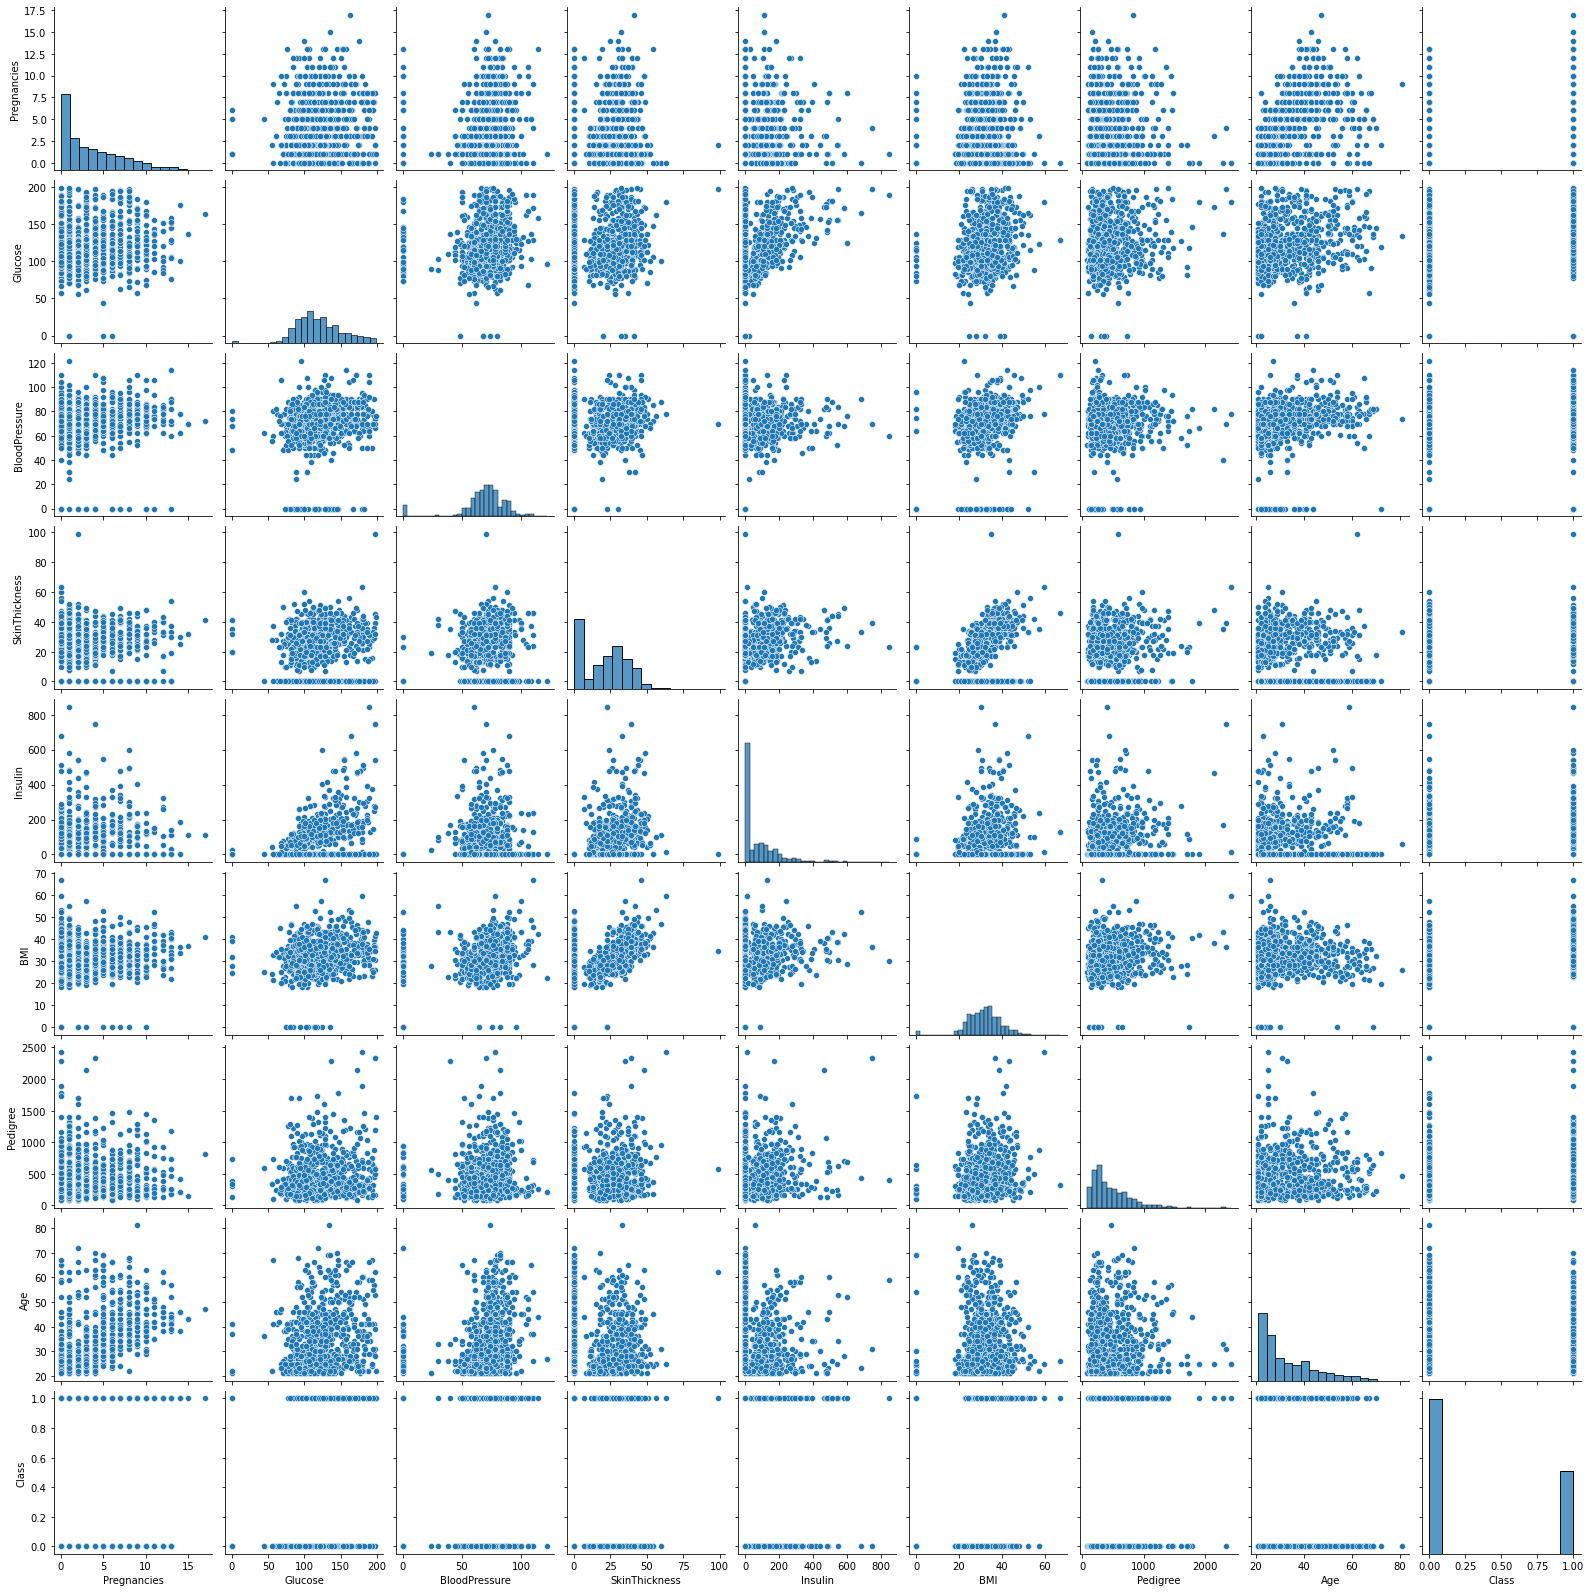

In [12]:
sns.pairplot(diabetes)

In [15]:
diabetes['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [23]:
#base original
model = LogisticRegression(max_iter=1000)

In [24]:
y = diabetes['Class']
X = diabetes.drop(['Class'], axis=1)

In [25]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7, random_state=42)

In [26]:
model.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000)

In [28]:
predictions_1 = model.predict(X_teste)

In [36]:
print('Regressão Logística - acurácia: ',accuracy_score(y_true=y_teste, y_pred=predictions_1))
print()
print(classification_report(y_true=y_teste, y_pred=predictions_1))

print(confusion_matrix(y_true=y_teste, y_pred=predictions_1))

Regressão Logística - acurácia:  0.7359307359307359

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[120  31]
 [ 30  50]]


In [40]:
#base padronizada
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

In [45]:
X_treino_s, X_teste_s, y_treino_s, y_teste_s = train_test_split(X_padronizado, y, train_size=0.7, random_state=42)

model.fit(X_treino_s, y_treino_s)

LogisticRegression(max_iter=1000)

In [46]:
predictions_2 = model.predict(X_teste_s)

In [47]:
print('Padronização - acurácia: ',accuracy_score(y_true=y_teste_s, y_pred=predictions_2))
print()
print(classification_report(y_true=y_teste_s, y_pred=predictions_2))

print(confusion_matrix(y_true=y_teste_s, y_pred=predictions_2))

Padronização - acurácia:  0.7359307359307359

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[120  31]
 [ 30  50]]


In [48]:
#Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_treino_res, y_treino_res = sm.fit_resample(X_treino, y_treino.ravel())

In [49]:
#Após o Oversampling
print(sum(y_treino_res == 1))
print(sum(y_treino_res == 0))

349
349


In [50]:
model.fit(X_treino_res, y_treino_res)

LogisticRegression(max_iter=1000)

In [51]:
predictions_3 = model.predict(X_teste)

In [52]:
print('Oversampling - acurácia: ',accuracy_score(y_true=y_teste, y_pred=predictions_3))
print()
print(classification_report(y_true=y_teste, y_pred=predictions_3))

print(confusion_matrix(y_true=y_teste, y_pred=predictions_3))

Oversampling - acurácia:  0.7012987012987013

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       151
           1       0.55      0.70      0.62        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.73      0.70      0.71       231

[[106  45]
 [ 24  56]]
